In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import xarray as xr
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import netCDF4
from tqdm import tqdm
from pathlib import Path
import shutil
from datetime import datetime

In [3]:
import sys
sys.path.append('../')

In [4]:
import solar

In [5]:
# SOLAR_OUTPUT = Path('../solar_geometry/')
# SOLAR_OUTPUT.mkdir(exist_ok=True)

In [6]:
import warnings

In [7]:
# from pysolar.solar import get_altitude, get_azimuth

In [8]:
# import pysolar.solar

In [9]:
ROOT = Path('../final/')

In [10]:
dirs = sorted(ROOT.glob('*/*/*/*'))

In [11]:
# def get_solzen(f):
#     ds = xr.open_dataset(f).reset_coords()
#     ds = ds[['latitude','longitude','start_time','end_time']]
#     ds.close()
#     start_time = pd.to_datetime(ds.start_time.item(), utc=True).to_pydatetime()
#     lon,lat = np.meshgrid(ds.longitude.values.ravel(), ds.latitude.values.ravel())
#     with warnings.catch_warnings():
#         warnings.simplefilter('ignore')
#         altitude = get_altitude(lat.ravel(), lon.ravel(), start_time)
#     solzen = (90-altitude).reshape(lon.shape)
    
#     attrs = {
#         'standard_name': 'solar_zenith_angle',
#         'units':'degree'
#     }
    
#     return xr.DataArray(solzen[np.newaxis], dims=['time','latitude','longitude'],
#                         coords={'latitude':ds.latitude, 'longitude':ds.longitude, 'start_time':(['time'], ds.start_time),
#                                 'end_time':(['time'], ds.end_time)
#                                },
#                         attrs=attrs
#                        )

In [12]:
# def get_solazi(f):
#     ds = xr.open_dataset(f).reset_coords()
#     ds = ds[['latitude','longitude','start_time','end_time']]
#     ds.close()
#     start_time = pd.to_datetime(ds.start_time.item(), utc=True).to_pydatetime()
#     lon,lat = np.meshgrid(ds.longitude.values.ravel(), ds.latitude.values.ravel())
#     with warnings.catch_warnings():
#         warnings.simplefilter('ignore')
#         azimuth = get_azimuth(lat.ravel(), lon.ravel(), start_time)
#     solazi = ((azimuth+90)%360).reshape(lon.shape)
    
#     attrs = {
#         'standard_name': 'solar_azimuth_angle',
#         'units':'degree',
#         'description':'solar angle for surface observer in degrees clockwise from north',
#         'value_range':'0 to 360 degrees'
#     }
    
#     return xr.DataArray(solazi[np.newaxis], dims=['time','latitude','longitude'],
#                         coords={'latitude':ds.latitude, 'longitude':ds.longitude, 'start_time':(['time'], ds.start_time),
#                                 'end_time':(['time'], ds.end_time)
#                                },
#                         attrs=attrs
#                        )

In [17]:
encoding = {'solar_zenith_angle':{'zlib':True, 'scale_factor':.1, 'add_offset':0, 'dtype':'i2',
                                  'chunksizes':(1,1800,3600), '_FillValue':netCDF4.default_fillvals['i2']}}

In [18]:
with tqdm(dirs) as bar:
    for d in bar:
        try:
            f = min(d.glob('ISCCP-NG*.nc'))
        except ValueError:
            continue
        out_fname = f.parent / ('ISCCP-NG_L1g_demo_A1_v1_res_0_10deg__solar_zenith_angle_' + f.name.split('_')[-1])
        tmp_fname = out_fname.parent / (out_fname.name+'.tmp')
        if not out_fname.exists():
            out = solar.get_solzen(f).to_dataset(name='solar_zenith_angle')
            out.to_netcdf(tmp_fname, encoding=encoding)
            tmp_fname.rename(out_fname)
            bar.set_description(str(out_fname))
        

../final/2020/202001/20200107/20200107T1000/ISCCP-NG_L1g_demo_A1_v1_res_0_10deg__solar_zenith_angle_20200107T1000.nc:   8%|▊         | 309/3910 [00:23<04:31, 13.26it/s] 


KeyboardInterrupt: 

In [65]:
encoding = {'solar_azimuth_angle':{'zlib':True, 'scale_factor':.1, 'add_offset':0, 'dtype':'i2',
                                  'chunksizes':(1,1800,3600), '_FillValue':netCDF4.default_fillvals['i2']}}

In [66]:
with tqdm(dirs) as bar:
    for d in bar:
        try:
            f = min(d.glob('ISCCP-NG*.nc'))
        except ValueError:
            continue
        out_fname = f.parent / ('ISCCP-NG_L1g_demo_A1_v1_res_0_10deg__solar_azimuth_angle_' + f.name.split('_')[-1])
        tmp_fname = out_fname.parent / (out_fname.name+'.tmp')
        if not out_fname.exists():
            out = get_solazi(f).to_dataset(name='solar_azimuth_angle')
            out.to_netcdf(tmp_fname, encoding=encoding)
            tmp_fname.rename(out_fname)
            bar.set_description(str(out_fname))
        

../demo_20210908/2020/202010/20201001/20201001T0000/ISCCP-NG_L1g_demo_A1_v1_res_0_10deg__solar_azimuth_angle_20201001T0000.nc: 100%|██████████| 1827/1827 [52:28<00:00,  1.72s/it]


  0%|          | 0/1527 [00:00<?, ?it/s]


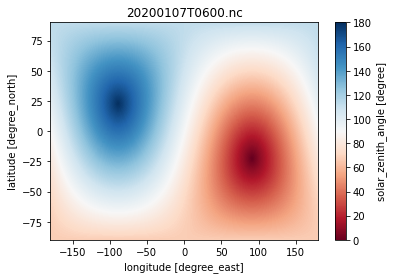

In [101]:
with tqdm(dirs[300:]) as bar:
    for d in bar:
        f = next(d.glob('*solar_zenith_angle_*.nc'))
        ds = xr.open_dataset(f)
        fig = figure()
        ds.solar_zenith_angle.squeeze().plot.imshow(cmap='RdBu', vmin=0, vmax=180)
        title(f.name[-16:])
        break

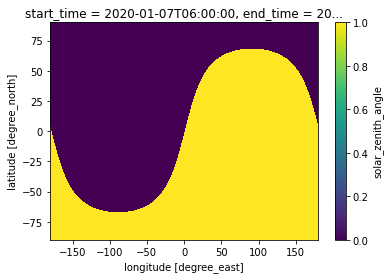

In [102]:
(ds.solar_zenith_angle < 90).squeeze().plot.imshow()

In [103]:
ds = xr.open_dataset(next(f.parent.glob('*00_65um_2020*')))

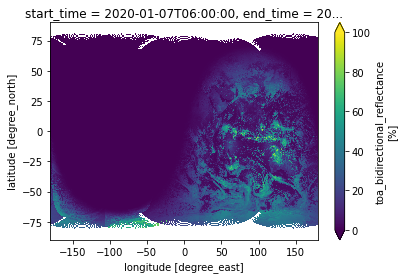

In [104]:
ds.refl_00_65um[0,0].plot.imshow(vmin=0, vmax=100)

In [106]:
from ftplib import FTP

In [172]:
ftp = FTP('ftp.ssec.wisc.edu')

In [173]:
_ = ftp.login()

In [174]:
ftp.cwd('/ISCCP-NG/L1g/demo_20210908')

'250 CWD command successful'

In [146]:
def walk():
    pwd = ftp.pwd()
    for d,attrs in ftp.mlsd():
        if attrs['type'] == 'dir' and d not in ['.','..']:
            ftp.cwd(d)
            yield from walk()
            ftp.cwd('..')
        if attrs['type'] == 'file':
            yield Path(pwd) / d

In [147]:
files_to_delete = []
with tqdm(walk()) as bar:
    for f in bar:
        if 'solar' in f.name or 'satzen' in f.name:
            files_to_delete.append(f)
            bar.set_description(f'{len(files_to_delete)}')

263: : 2959it [00:02, 1149.29it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

852: : 9453it [00:08, 1384.62it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

1226: : 13676it [00:12, 1399.09it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.io

In [151]:
with tqdm(files_to_delete[1:]) as bar:
    for f in bar:
        ftp.delete(str(f))

100%|██████████| 5480/5480 [00:11<00:00, 494.01it/s]


In [152]:
# Upload new files

In [178]:
with tqdm(dirs) as bar:
    for d in bar:
        for f in d.glob('*solar*'):
            dst = Path('/ISCCP-NG/L1g') / f.relative_to(Path('..'))
            with open(f,'rb') as fp:
                ftp.storbinary(f'STOR {dst}', fp)

100%|██████████| 1827/1827 [05:24<00:00,  5.64it/s]


In [179]:
ftp.close()

In [180]:
ds = xr.open_dataset('../ISCCP-NG_L1g_demo_A1_v1_res_0_10deg__solar_zenith_angle_20200701T1800.nc')

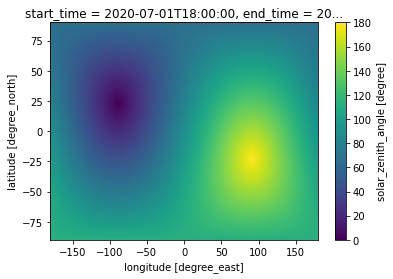

In [184]:
ds.solar_zenith_angle[0].plot.imshow()

In [185]:
ds.close()